In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import datetime as dt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [25]:
df=pd.read_csv("healthcare-dataset-stroke-data.csv")

In [26]:
# Handling missing values for the 'bmi' column by assigning the result back
df['bmi'] = df['bmi'].fillna(df['bmi'].median())

# Data encoding
let's analyse data and convert data in 0's and 1's from  because the model knows only 0's and 1's values. 

In [27]:
df['Residence_type'] = df['Residence_type'].apply(lambda x: 1 if x == 'Urban' else 0)
display(df[['Residence_type']].head())

,Residence_type
0,1
1,0
2,0
3,1
4,0


In [28]:
df['Urban/Rural'] = df['Residence_type'].apply(lambda x: 1 if x == 'Urban' else 0)


df['work_type_Never_worked'] = df['work_type'].apply(lambda x: 1 if x == 'Never_worked' else 0)
df['work_type_Private'] = df['work_type'].apply(lambda x: 1 if x == 'Private' else 0)
df['work_type_Self_employed'] = df['work_type'].apply(lambda x: 1 if x == 'Self-employed' else 0)


df['smoking_status_formerly_smoked'] = df['smoking_status'].apply(lambda x: 1 if x == 'formerly smoked' else 0)
df['smoking_status_never_smoked'] = df['smoking_status'].apply(lambda x: 1 if x == 'never smoked' else 0)
df['smoking_status_smokes'] = df['smoking_status'].apply(lambda x: 1 if x == 'smokes' else 0)

df_model = df.copy()

df_model.drop(['Residence_type', 'work_type', 'smoking_status', 'gender', 'ever_married','id'], axis=1, inplace=True)

In [29]:
df_model.head(5)

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,Urban/Rural,work_type_Never_worked,work_type_Private,work_type_Self_employed,smoking_status_formerly_smoked,smoking_status_never_smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,0,0,1,0,1,0,0
1,61.0,0,0,202.21,28.1,1,0,0,0,1,0,1,0
2,80.0,0,1,105.92,32.5,1,0,0,1,0,0,1,0
3,49.0,0,0,171.23,34.4,1,0,0,1,0,0,0,1
4,79.0,1,0,174.12,24.0,1,0,0,0,1,0,1,0


**Now we only have the data which is in the form of 0's & 1's**

# Building ML Model

**Now,we can use it for traning a model**

In [30]:
X = df_model.drop('stroke', axis=1) # independent var
y = df_model['stroke'] # Dependent var

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train

,age,hypertension,heart_disease,avg_glucose_level,bmi,Urban/Rural,work_type_Never_worked,work_type_Private,work_type_Self_employed,smoking_status_formerly_smoked,smoking_status_never_smoked,smoking_status_smokes
802,79.00,0,0,112.64,28.5,0,0,0,1,1,0,0
3927,62.00,0,0,88.32,36.3,0,0,1,0,0,0,0
2337,21.00,0,0,59.52,33.7,0,0,1,0,0,1,0
3910,31.00,0,0,65.70,30.4,0,0,0,0,1,0,0
1886,31.00,0,0,59.63,19.9,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4426,43.00,0,0,88.00,30.6,0,0,0,0,0,1,0
466,61.00,1,0,170.05,60.2,0,0,1,0,0,0,1
3092,1.16,0,0,97.28,17.8,0,0,0,0,0,0,0
3772,80.00,0,0,196.08,31.0,0,0,0,1,1,0,0


## Basic Machine Learning Models

- Linear Regression
- Lasso Regression
- Ridge Regression
- Logistic Regression


## Root Mean Square error values (RMSE)

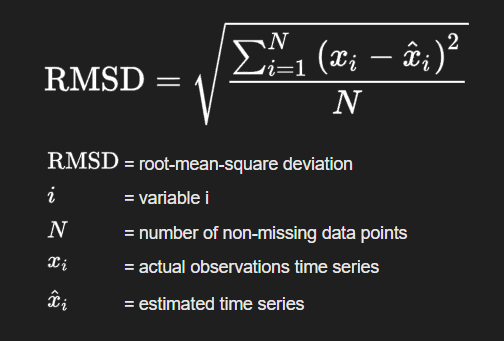

## let's try these models on our dataset

## 1) Linear Regression

In [31]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
linear_reg_predictions = linear_reg.predict(X_test)
linear_reg_rmse = np.sqrt(mean_squared_error(y_test, linear_reg_predictions))
linear_reg_rmse_percentage = linear_reg_rmse*100
linear_reg_rmse_percentage

22.75221379298586

In [32]:
linear_reg.score(X_test, y_test)*100

9.158104214473495

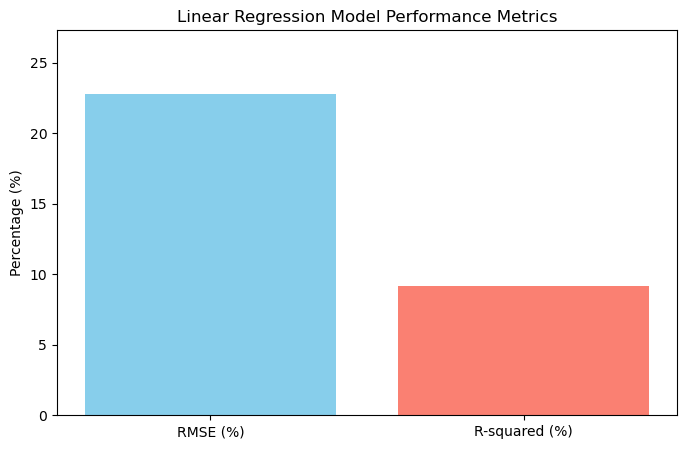

In [33]:
# Calculate RMSE and R-squared score
linear_reg_rmse_percentage = linear_reg_rmse * 100
linear_reg_r2_score = linear_reg.score(X_test, y_test) * 100

# Plotting RMSE and R-squared score side by side
plt.figure(figsize=(8, 5))
metrics = ['RMSE (%)', 'R-squared (%)']
values = [linear_reg_rmse_percentage, linear_reg_r2_score]

plt.bar(metrics, values, color=['skyblue', 'salmon'])
plt.ylabel('Percentage (%)')
plt.title('Linear Regression Model Performance Metrics')
plt.ylim(0, max(values) * 1.2)  # Adding some padding to the top of the y-axis for better visualization
plt.show()


**we got RMSE 22% and r-squared 9% for linear Regression**

## 2) Lasso Regression

In [34]:
lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)
lasso_reg_predictions = lasso_reg.predict(X_test)
lasso_reg_rmse = np.sqrt(mean_squared_error(y_test, lasso_reg_predictions))
lasso_reg_rmse*100

23.75591285773879

In [35]:
lasso_reg.score(X_test, y_test)*100

0.9664571036630765

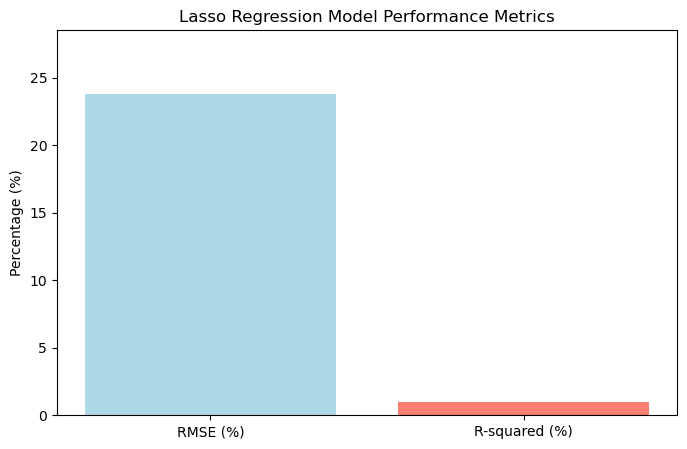

In [36]:
# Calculate RMSE and R-squared score in percentage
lasso_reg_rmse_percentage = lasso_reg_rmse * 100
lasso_reg_r2_score = lasso_reg.score(X_test, y_test) * 100

# Plotting RMSE and R-squared score as a bar chart
plt.figure(figsize=(8, 5))
metrics = ['RMSE (%)', 'R-squared (%)']
values = [lasso_reg_rmse_percentage, lasso_reg_r2_score]

plt.bar(metrics, values, color=['lightblue', 'salmon'])
plt.ylabel('Percentage (%)')
plt.title('Lasso Regression Model Performance Metrics')
plt.ylim(0, max(values) * 1.2)  # Adding some padding to the top for better visualization
plt.show()

**we got RMSE 23% and r-squared 1% for lasso Regression**

## 3) Rigid Regression

In [37]:
Rigid_reg = Ridge()
Rigid_reg.fit(X_train, y_train)
Rigid_reg_predictions = Rigid_reg.predict(X_test)
Rigid_reg_rmse = np.sqrt(mean_squared_error(y_test, Rigid_reg_predictions))
Rigid_reg_rmse*100


22.752381738612115

In [38]:
Rigid_reg.score(X_test, y_test)*100

9.15676310933755

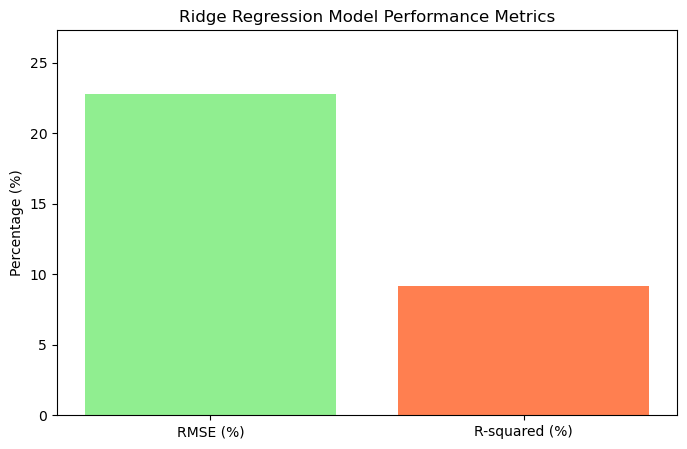

In [39]:
# Calculate RMSE and R-squared score in percentage
ridge_reg_rmse_percentage = Rigid_reg_rmse * 100
ridge_reg_r2_score = Rigid_reg.score(X_test, y_test) * 100

# Plotting RMSE and R-squared score for Ridge regression as a bar chart
plt.figure(figsize=(8, 5))
metrics = ['RMSE (%)', 'R-squared (%)']
values = [ridge_reg_rmse_percentage, ridge_reg_r2_score]

plt.bar(metrics, values, color=['lightgreen', 'coral'])
plt.ylabel('Percentage (%)')
plt.title('Ridge Regression Model Performance Metrics')
plt.ylim(0, max(values) * 1.2)  # Adding some padding for better visualization
plt.show()

**we got RMSE 22% and r-squared 9% for Rigid Regression**

## 4) Logistic Regression

In [40]:
clf=LogisticRegression()
clf.fit(X_train, y_train)
Logistic_pred = clf.predict(X_test)
Log_reg_rmse = np.sqrt(mean_squared_error(y_test, Logistic_pred))
Log_reg_rmse*100

24.630339428279314

In [41]:
clf.score(X_test, y_test)*100

93.9334637964775

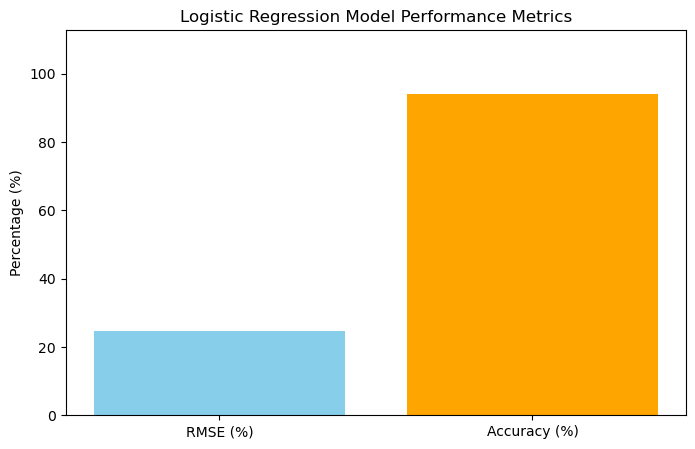

In [42]:
# Calculate RMSE and accuracy score in percentage
log_reg_rmse_percentage = Log_reg_rmse * 100
log_reg_accuracy_score = clf.score(X_test, y_test) * 100

# Plotting RMSE and accuracy score as a bar chart
plt.figure(figsize=(8, 5))
metrics = ['RMSE (%)', 'Accuracy (%)']
values = [log_reg_rmse_percentage, log_reg_accuracy_score]

plt.bar(metrics, values, color=['skyblue', 'orange'])
plt.ylabel('Percentage (%)')
plt.title('Logistic Regression Model Performance Metrics')
plt.ylim(0, max(values) * 1.2)  # Adding some padding for better visualization
plt.show()


**After testing multiple models on our dataset, including Linear Regression, Lasso Regression, Ridge Regression, and Logistic Regression, we observed that Logistic Regression achieved the highest accuracy. Given this high accuracy and the suitability of Logistic Regression for binary classification tasks, we conclude that it is the best-performing model for our analysis.**

**Logistic Regression not only provides strong predictive accuracy but also offers interpretability, computational efficiency, and robustness to overfitting, especially when regularization is applied. These qualities make it an ideal choice for our dataset, allowing us to effectively predict the likelihood of stroke occurrences based on the features provided.**
